# <center>Exploring and Visualizing Data</center>

<center>Shan-Hung Wu & DataLab<br/>Fall 2016</center>

The first step of Machine Learning is to understand your data, so you can identify a right target to learn and choose a proper learning technique among many candidates to apply. For example, some learning models assume that the data points are normally distributed. It is wise to verify this assumption before applying the models in your learning task. In this lab, we are going to guide you through the process of **Exploratory Data Analysis (EDA)** and discuss how you can leverage the Principle Component Analysis (PCA) to visualize and understand high-dimensional data.

##  Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an important and recommended first step of Machine Learning (prior to the training of a machine learning model that are more commonly seen in research papers). EDA performs the **exploration** and **exploitation** steps iteratively. In the exploration step, you "explore" the data, usually by visualizing them in different ways, to discover some characteristics of data. Then, in the exploitation step, you use the identified characteristics to figure out the next things to explore. You then repeat the above two steps until you are satisfied with what you have learned from the data.

Data visualization plays an important role in EDA. Next, we use the [Wine](https://archive.ics.uci.edu/ml/datasets/Wine) dataset from the UCI machine learning repository as an example dataset and show some common and useful plots.

## Visualizing the Important Characteristics of a Dataset

Let's download the [Wine](https://archive.ics.uci.edu/ml/datasets/Wine) dataset using [Pandas](http://pandas.pydata.org/) first:

In [16]:
'''
machine learning basic tools :

matplotlib.pyplot: 用來繪製影像
sklearn.datasets: 用來繪入內建之手寫數字資料庫
sklearn.svm: SVM 支持向量機之演算法物件
sklearn.metrics: 用來評估辨識準確度以及報表的顯示
'''

import pandas as pd

#read data
#the header : Row number(s) to use as the column names, and the start of the data. Default be 0, which means "NO"
#name would be passed
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
#And by "name" means an array-like storage, default None
#List of column names to use. If file contains no header row, then you should explicitly pass header=None
#p.s. csv is a kind of texted data file, using commas to separate data and figures

##set columns
df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
'Alcalinity of ash', 'Magnesium', 'Total phenols', 
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

#drop : Return new object with labels in requested axis removed.
#drop(labels[, axis, level, inplace, errors])

X = df.drop('Class label', 1)
y = df['Class label']

#head(int n) returns first n rows. head() would return all 
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


As we can see, showing data row-by-row with their column names does not help us get the "big picture" and characteristics of data. 

#### Pairwise Join Distributions

We can instead see the join distribution of any pair of columns/attributes/variables/features by using the `pairplot` function offered by [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/), which is based on [Matplotlib](http://matplotlib.org/):

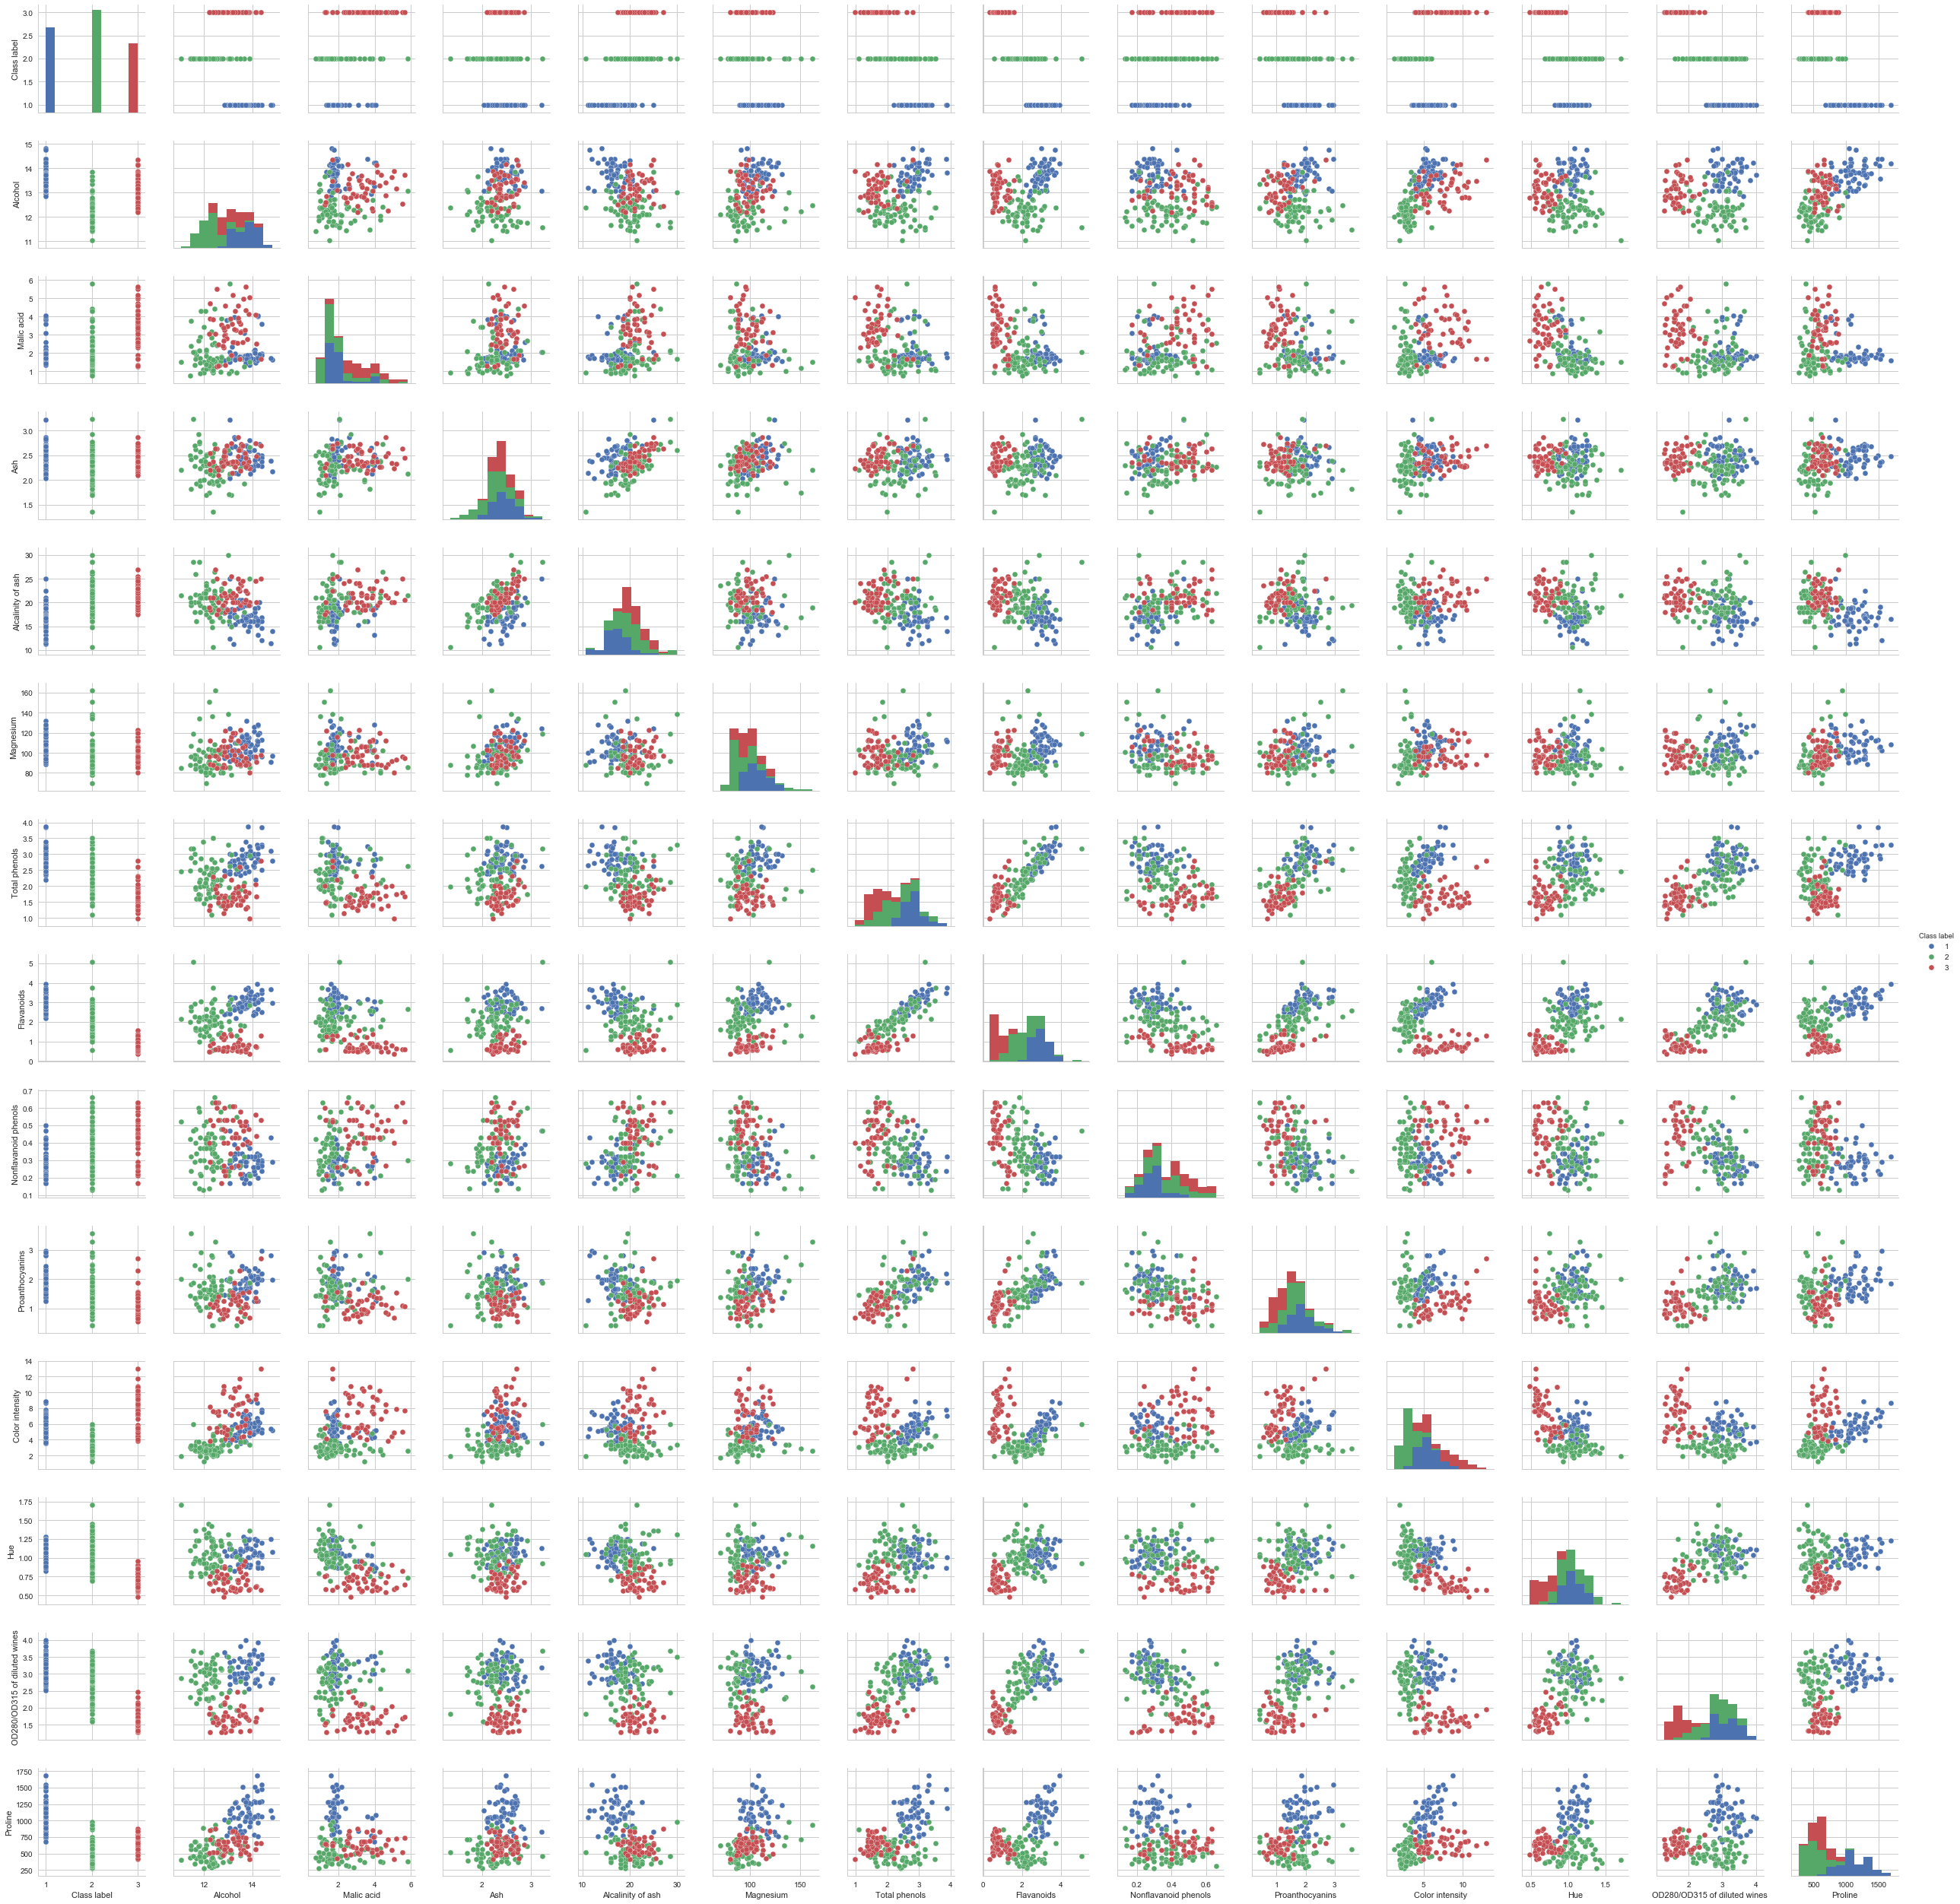

In [17]:
# inline plotting instead of popping out
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

#define show style
sns.set(style='whitegrid', context='notebook')
#sns.reset_orig()

#pairplot (data, hue=None, hue_order=None, palette=None, 
#    vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='hist', 
#    markers=None, size=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None)
#create a grid of Axes such that each variable in data will by shared in the y-axis across a single row 
#and in the x-axis across a single column. The diagonal Axes are treated differently, 
#drawing a plot to show the univariate distribution of the data for the variable in that column.
sns.pairplot(df, hue="Class label", size=2.5)
#plt.tight_layout()
#plt.savefig('./output/fig-wine-scatter.png', dpi=300)
plt.show()

From the above figures, we can easily see that there is a linear relationship between the "Total phenols" and "Flavanoids" variables. Furthermore, the class label cannot be easily predicted by a single variable. You may have noticed that the figures along the diagonal look different. They are histograms of values of individual variables. We can see that the "Ash" and "Alcalinity of ash" variables are roughly normally distributed.

NOTE: importing the Seaborn library modifies the default aesthetics of Matplotlib for the current Python session. If you do not want to use Seaborn's style settings, you can reset the Matplotlib settings by calling:
```
>>> sns.reset_orig()
```

#### Correlation Matrix

Showing the pairwise join distributions may still be overwhelming when we have a lot of variables in the dataset. Sometimes, we can just plot the correlation matrix to quantify the linear relationship between variables. The **correlation coefficient** between two random variables $\mathrm{a}$ and $\mathrm{b}$ are defined as: 

$$\frac{\mathrm{Cov}(\mathrm{a},\mathrm{b})}{\sqrt{\mathrm{Var}(\mathrm{a})\mathrm{Var}(\mathrm{b})}}.$$ 

Basically, it is the "normalized" variance that captures the **linear** relationship of the two random variables, and the values are bounded to the range $[-1,1]$. The correlation matrix $\boldsymbol{R}\in\mathbb{R}^{D\times D}$ of a random vector $\boldsymbol{\mathrm{x}}$ is a square matrix whose each element $R_{i,j}$ denotes the correlation between the attributes $\mathrm{x}_i$ and $\mathrm{x}_j$. If we regard data points as the i.i.d. samples of $\boldsymbol{\mathrm{x}}$, then we can have an estimate $\hat{\boldsymbol{R}}$ whose each element 

$$\hat{R}_{i,j}=\frac{\Sigma_{s=1}^{N}(x_{i}^{(s)}-\hat{\mu}_{\mathrm{x}_{i}})(x_{j}^{(s)}-\hat{\mu}_{\mathrm{x}_{j}})}{\sqrt{\Sigma_{s=1}^{N}(x_{i}^{(s)}-\hat{\mu}_{\mathrm{x}_{i}})^{2}}\sqrt{\Sigma_{s=1}^{N}(x_{j}^{(s)}-\hat{\mu}_{\mathrm{x}_{j}})^{2}}}=\frac{\hat{\sigma}_{\mathrm{x}_{i},\mathrm{x}_{j}}}{\hat{\sigma}_{\mathrm{x}_{i}}\hat{\sigma}_{\mathrm{x}_{j}}}$$

is an estimate of the correlation (usually called the **Pearson's r**) between attribute $\mathrm{x}_i$ and $\mathrm{x}_j$. Note that if we **z-normalize** each data point such that 

$$z_{i}^{(s)}=\frac{x_{i}^{(s)}-\hat{\mu}_{\mathrm{x}_{i}}}{\hat{\sigma}_{\mathrm{x}_{i}}}$$

for all $i$. Then we simply have $\hat{\boldsymbol{R}}=\frac{1}{N}\boldsymbol{Z}^\top \boldsymbol{Z}$, where $\boldsymbol{Z}$ is the design matrix of the normalized data points. We can plot  $\hat{\boldsymbol{R}}$ as follows: 

In [19]:
##Notes :
##pearson product-moment correlation coefficient can measure the relation between two attributes
##coefficients be bounded between -1 and 1
##P.S. x, y be features

import numpy as np
from sklearn.preprocessing import StandardScaler

# Z-normalize data
sc = StandardScaler()
Z = sc.fit_transform(X)
##StandardScalar() standardize features by removing the mean and scaling to unit variance

# Estimate the correlation matrix
P = np.dot(Z.T, Z) / df.shape[0]
#print (P)

sns.set(font_scale=0.5)
hm = sns.heatmap(P, 
            cbar=True,
            square=True,
            yticklabels=X.columns,
            xticklabels=X.columns)

plt.tight_layout()
#plt.savefig('./output/fig-wine-corr.png', dpi=300)
plt.show()

sns.reset_orig()

ValueError: Arrays were different lengths: 13 vs 0

The correlation matrix gives a more concise view of the relationship between variables. Some models, such the linear regression, assume that the explanatory variables are linearly correlated to the target variable. A heatmap of correlations can help us select variables supporting this assumption. For example, if we want to predict the "Hue" variable using the linear regression, we may pick the "Malic acid" and "Flavanoids" as the explanatory variables.

NOTE: we could have simply used the NumPy function 
```
>>> P = np.corrcoef(df.values.T)
```
to get the estimate $\hat{\boldsymbol{P}}$ of the correlation matrix. We calculate $\hat{\boldsymbol{P}}$ by ourselves using the normalized design matrix $\boldsymbol{Z}$ because we will reuse $\boldsymbol{Z}$ later.

## PCA for Visualization

PCA reduces the dimension of data points, and has been widely used across different machine learning tasks. One application of PCA is to help the visualization of high-dimensional data, as discussed next. Before we start, let's summarize PCA in a few simple steps:


1. Standardize the $D$-dimensional dataset $\boldsymbol{X}$, e.g., via the $z$-normalization, and get $\boldsymbol{Z}$;
2. Estimate the covariance matrix $\hat{\boldsymbol{P}}$;
3. Decompose $\hat{\boldsymbol{P}}$ into its eigenvectors and eigenvalues;
4. Select $K$ eigenvectors that correspond to the $K$ largest eigenvalues, where $K$ is the dimensionality of the new feature subspace ($k < d$);
5. Construct a projection matrix $\boldsymbol{W}$ from the top-$K$ eigenvectors;
6. Transform the $D$-dimensional input dataset $\boldsymbol{X}$ using the projection matrix $\boldsymbol{W}$.

#### Eigendecomposition

Since we already have $\boldsymbol{Z}$ and $\hat{\boldsymbol{P}}$ from the above. We can begin from the step 3:

In [21]:
##Notes :
##a covariance matrix is a matrix whose element in the i, j position 
##is the covariance between the i th and j th elements of a random vector

eigen_vals, eigen_vecs = np.linalg.eigh(P)

print('\nEigenvalues: \n%s' % eigen_vals)


Eigenvalues: 
[ 0.10337794  0.16877023  0.22578864  0.25090248  0.28887994  0.34849736
  0.55102831  0.64165703  0.85322818  0.91897392  1.44607197  2.49697373
  4.70585025]


NOTE: there is an `np.linalg.eig()` function in NumPy that also eigendecomposes matrices. The difference is that `np.linalg.eigh()` is optimized for symmetric matrices whose eigenvalues are always real numbers. The numerically less stable `np.linalg.eig()` can decompose non-symmetric square matrices and returns complex eigenvalues. 

#### Eigenvector Selection

In step 4, we need to decide the value of $K$. We can plot the **variance explained ratio** of each eigenvalue:

$$\frac{\vert\lambda_{j}\vert}{\Sigma_{j=1}^{D}\vert\lambda_{j}\vert}$$

in the descending order to help us decide how many eigenvectors to keep.

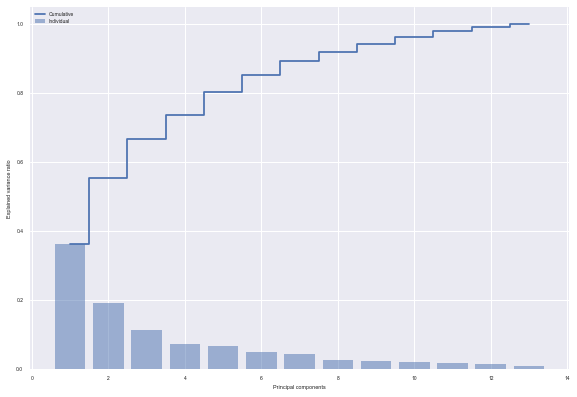

In [23]:
import matplotlib.pyplot as plt

tot = sum(np.abs(eigen_vals))
var_exp = [(i / tot) for i in sorted(np.abs(eigen_vals), reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, eigen_vals.size + 1), var_exp, alpha=0.5, align='center',
        label='Individual')
plt.step(range(1, eigen_vals.size + 1), cum_var_exp, where='mid',
         label='Cumulative')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('./output/fig-pca-var-exp.png', dpi=300)
plt.show()

The resulting plot indicates that the first principal component alone accounts for 40 percent of the variance. Also, we can see that the first two principal components combined explain almost 60 percent of the variance in the data. Next, we collect the two eigenvectors that correspond to the two largest values to capture about 60 percent of the variance in this dataset. Note that we only chose two eigenvectors for the purpose of illustration, since we are going to plot the data via a two-dimensional scatter plot later in this subsection. In practice, the number of principal components can be determined by other reasons, such as the trade-off between computational efficiency and performance.

#### Feature Transformation

Let's now proceed with the last three steps to project the standardized Wine dataset onto the new principal component axes. We start by sorting the eigenpairs by decreasing order of the eigenvalues:

In [15]:
print (len(eigen_vals))
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(reverse=True)

13


Next, we pick the first two eigenvectors and form the project matrix $\boldsymbol{W}$:

In [19]:
W = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Peojection matrix W:\n', W)

Peojection matrix W:
 [[-0.1443294   0.48365155]
 [ 0.24518758  0.22493093]
 [ 0.00205106  0.31606881]
 [ 0.23932041 -0.0105905 ]
 [-0.14199204  0.299634  ]
 [-0.39466085  0.06503951]
 [-0.4229343  -0.00335981]
 [ 0.2985331   0.02877949]
 [-0.31342949  0.03930172]
 [ 0.0886167   0.52999567]
 [-0.29671456 -0.27923515]
 [-0.37616741 -0.16449619]
 [-0.28675223  0.36490283]]


Finally, we can obtain the compressed dataset by:

$$\boldsymbol{Z}^{\text{PCA}}=\boldsymbol{Z}\boldsymbol{W}$$
    
and visualize it using:

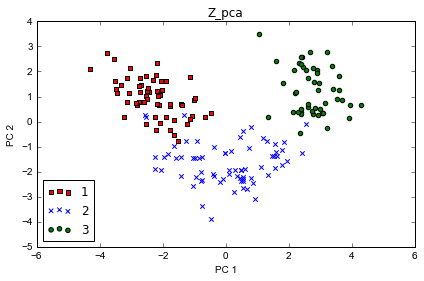

In [42]:
Z_pca = Z.dot(W)

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y.values), colors, markers):
    plt.scatter(Z_pca[y.values==l, 0], 
                Z_pca[y.values==l, 1], 
                c=c, label=l, marker=m)

plt.title('Z_pca')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.savefig('./output/fig-pca-z.png', dpi=300)
plt.show()

As we can see, the data is more spread along the x-axis corresponding to the first principal component than the y-axis (second principal component), which is consistent with the explained variance ratio plot that we created in the previous subsection. PCA may save us from examining a lot of pairwise distributions (as shown in the previous section) when the original data dimension $D$ is high. For example, if we see that the data points with different labels can be separated in the space of PCs, then we can simply choose a linear classifier to do the classification.

Finally, let's save the compressed dataset for future use.

In [43]:
np.save('./output/Z_pca.npy', Z_pca)